# Computer Vision Project 


## Face Mask Detection
#### By Ahmed El Melegy , Ahmed Eid 

##### First Pipeline training a CNN model for detection a mask or no mask 

In [2]:
import os
path ="face-mask/data"
data=[]
classes=[]
for cls in os.listdir(path):
    path_=os.path.join(path,cls)
    for i in  os.listdir(path_):
        data.extend([os.path.join(path,cls,i)])
        classes.extend([cls])

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
Data=pd.DataFrame({"data":data,"classes":classes})
Data[:10]

,data,classes
0,face-mask/data\without_mask\without_mask_1.jpg,without_mask
1,face-mask/data\without_mask\without_mask_10.jpg,without_mask
2,face-mask/data\without_mask\without_mask_100.jpg,without_mask
3,face-mask/data\without_mask\without_mask_1000.jpg,without_mask
4,face-mask/data\without_mask\without_mask_1001.jpg,without_mask
5,face-mask/data\without_mask\without_mask_1002.jpg,without_mask
6,face-mask/data\without_mask\without_mask_1003.jpg,without_mask
7,face-mask/data\without_mask\without_mask_1004.jpg,without_mask
8,face-mask/data\without_mask\without_mask_1005.jpg,without_mask
9,face-mask/data\without_mask\without_mask_1006.jpg,without_mask


In [14]:
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

train,test=train_test_split(Data,stratify=Data["classes"],test_size=0.2)#stratify


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_ =train_datagen.flow_from_dataframe(train.copy(),x_col="data",y_col="classes",target_size=(150, 150), class_mode='binary',batch_size=16)
test_ =test_datagen.flow_from_dataframe(test.copy(),x_col="data",y_col="classes",target_size=(150, 150), class_mode='binary',batch_size=16)


Found 6042 validated image filenames belonging to 2 classes.
Found 1511 validated image filenames belonging to 2 classes.


In [18]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.preprocessing import image
import cv2
import datetime

#### The CNN model architecture

In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

In [22]:
history = model.fit(train_,
                    epochs = 20)

Epoch 1/20
127/378 [=========>....................] - ETA: 2:40 - loss: 0.5857 - accuracy: 0.6754

C:\Users\Master\anaconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


378/378 [==============================] - 291s 647ms/step - loss: 0.4554 - accuracy: 0.7769
Epoch 2/20
378/378 [==============================] - 134s 355ms/step - loss: 0.2763 - accuracy: 0.8904
Epoch 3/20
378/378 [==============================] - 123s 325ms/step - loss: 0.2084 - accuracy: 0.9181
Epoch 4/20
378/378 [==============================] - 126s 334ms/step - loss: 0.1904 - accuracy: 0.9296
Epoch 5/20
378/378 [==============================] - 127s 336ms/step - loss: 0.1670 - accuracy: 0.9391
Epoch 6/20
378/378 [==============================] - 128s 339ms/step - loss: 0.1446 - accuracy: 0.9485
Epoch 7/20
378/378 [==============================] - 133s 351ms/step - loss: 0.1168 - accuracy: 0.9598
Epoch 8/20
378/378 [==============================] - 129s 341ms/step - loss: 0.1090 - accuracy: 0.9617
Epoch 9/20
378/378 [==============================] - 127s 335ms/step - loss: 0.0959 - accuracy: 0.9653
Epoch 10/20
378/378 [==============================] - 127s 335ms/step - lo

#### Save the model for further process to not train again just load the the trained model

In [23]:
model.save('face_mask_model.h5',model)

In [25]:
model.evaluate(test_)

95/95 [==============================] - 33s 347ms/step - loss: 0.1136 - accuracy: 0.9682


[0.11356310546398163, 0.9682329297065735]

#### Example of CNN  Classification 

In [28]:
import matplotlib.pyplot as plt

In [33]:
test['data']

4705          face-mask/data\with_mask\with_mask_1789.jpg
2964    face-mask/data\without_mask\without_mask_3667.jpg
3920          face-mask/data\with_mask\with_mask_1081.jpg
7004           face-mask/data\with_mask\with_mask_504.jpg
1033    face-mask/data\without_mask\without_mask_1929.jpg
                              ...                        
3592     face-mask/data\without_mask\without_mask_787.jpg
4491          face-mask/data\with_mask\with_mask_1596.jpg
4960          face-mask/data\with_mask\with_mask_2017.jpg
2763    face-mask/data\without_mask\without_mask_3486.jpg
5263          face-mask/data\with_mask\with_mask_2290.jpg
Name: data, Length: 1511, dtype: object

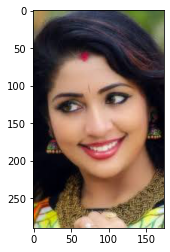

In [50]:
im = plt.imread('face-mask/data\without_mask\without_mask_1929.jpg')
# show the image
plt.imshow(im)
plt.show()

In [43]:
from keras.preprocessing import image
import cv2

In [51]:
im=cv2.imread('face-mask/data\without_mask\without_mask_1929.jpg')
target_size=(150,150)
test_image=cv2.resize(im,target_size)
test_image=np.expand_dims(test_image,axis=0)
model.predict(test_image)[0][0]

0.0

### Second Pipeline Face Detection Using Viola Jones Classifer 

#### The entire pipeline 
pre - processing 
load the trained CNN model for mask detection 
load the trained 50 Viola Jones Classifer for face detection 

1. read frame from video 
2. segment the frame into blocks of 19*19 with saving its position in the frame 
3. classify each block in it is Face or not using 50 Viola Jones classifer 
4. if it classified as face recall its positions 
5. if there are blocks classified as face get its window using the saved positions of face
6. take these windows to be (150,150,3) size and to be the input the CNN model to determine it is mask or not
7. then draw a rectingular green on that window if it is mask detected 
8. draw a rectingular red on that window if it is not mask detected  
9. don not draw any thing of there are no face detected  


######  Read the trained Viola Jones 50 classifer 

In [1]:
import pickle
def load(filename):
    """
    A static method which loads the classifier from a pickle
    Args:
            filename: The name of the file (no file extension necessary)
    """
    with open(filename+".pkl", 'rb') as f:
        return pickle.load(f)
    
with open("test.pkl", 'rb') as f:
    test = pickle.load(f)
clf = load('50')

In [2]:
from keras.models import load_model
from keras.preprocessing import image
import cv2
import datetime
import numpy as np
import random

mymodel=load_model('face_mask_model.h5')
windowsize_r=19
windowsize_c=19

cap=cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 60)
#face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
dim=(19,19)
while cap.isOpened():
    _,img=cap.read()
    #print(img.shape)
    windows=[]
    positions=[]
    for r in range(0,img.shape[0] - windowsize_r, windowsize_r):
        for c in range(0,img.shape[1] - windowsize_c, windowsize_c):
            window=img[r:r+windowsize_r,c:c+windowsize_c]
            window=cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
            #window.shape
            #print(window.shape)
            windows.append(window)
            positions.append([r,c])
    #fir = cv2.resize(fir, dim)
    #print(fir.shape)
    #print(positions[10][0],positions[10][1])
    print("number of the window for each frame ",len(windows))
    i=0
    #pos_x=int(img.shape[0])/2
    #pos_y=int(img.shape[1])/2
    pos_x_pos_y=[]
    face_detected=False
    counter=0
    for x in windows:
        prediction = clf.classify(x)
        if prediction ==1:
            counter=+1
            if counter >=1:       ###                   BIG NOTE       lOOK BELOW            #######
                face_detected=True
                pos_x_pos_y.append((positions[i][0],positions[i][1]))
                print("Face detecetd at ",positions[i][0],positions[i][1])
        else:
            counter=0
        i=+1
    #face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    #x,y=pos_x,pos_y
    print(pos_x_pos_y)
    w,h=400,400
    if face_detected==True:
        for x,y in pos_x_pos_y:
            face_img = img[y:y+h, x:x+w]
            cv2.imwrite('temp.jpg',face_img)
            test_image=image.load_img('temp.jpg',target_size=(150,150,3))
            test_image=image.img_to_array(test_image)
            test_image=np.expand_dims(test_image,axis=0)
            pred=mymodel.predict(test_image)[0][0]
            if pred==1:
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
                cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
            else:
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
                cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
            datet=str(datetime.datetime.now())
            cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

number of the window for each frame  825
[]
number of the window for each frame  825
[]
number of the window for each frame  825
[]
number of the window for each frame  825
[]
number of the window for each frame  825
[]


## BIG NOTE 

###### I made the counter varible for detection stability to make the model detect face if more than specific number(counter) of frame consecutive are classified as face , this to make the model stable BUT
######  when the counter threshold are above 1 the model fails to detect any faces in the frame , it only detect face in the frame if this threshold is set to 1 
###### THIS MEANS  consecutive_true_classified varible that we were asked to make it from the TA  Ahmed El Sayed will always zero because the counter threshlod is 1 to detect any face in the frame 

#### To Compare the performance of our model  with the open CV model Cascade Classider 
- we will use a built in function in open cv for face detection 
- then it will be the input to out CNN model to clssify it 
- the same design parametrs for input of the CNN model as previous 

#### Note that Our model do not use any cascade classifer unlike opencv 

In [3]:
cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=mymodel.predict(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

#### To Measure the performance of our model

1. Read a video of me (ahmed el melegy)
2. this video its frames are labeld by me by hand   , and these are the labels frames parameters
- some statistics 
- Video length is 23 second each second contain 30 frame
- it ws recorded on my PC with resolution 480 * 640 with 30 frame per second
- then reading the video using open cv with with only 8 frame per second  
- so 8 frame/sec * 23 sec = 184 frames in total   
- first 48 frames are labeld with Mask 1
- next 48(48 to 96) frames are labeld with  No Mask 0
- from (96 to 144) frmaes are labeled with  Mask 1
- from (144 to 184) frames are labeled with  No Mask 0 
- each frame was resized to be (19 * 19) to be the input to the 50 Viola Jones classifer , in gray
- (19*19) because this the dimension  that our model is trained and  i found it was the best dimention to get high accuracy 


In [4]:
count=0
capture = cv2.VideoCapture("WIN_20210704_15_58_52_Pro.mp4")
framespersecond= int(capture.get(cv2.CAP_PROP_FPS))
frames = capture.get(cv2.CAP_PROP_FRAME_COUNT)
seconds = int(frames / framespersecond)
print("the length of the video in seconds ",seconds)
print("frame per second is ",framespersecond)
print("total number of frames is ", frames)
'''
some statistics 
first 48 frames are labeld with Mask 1
next 48(48 to 96) frames are labeld with  No Mask 0
from (96 to 144) frmaes are labeled with  Mask 1
from (144 to 184) frames are labeled with  No Mask 0 

'''
frames=[]
target_size=(19,19)
while True:
    # capture frame-by-frame from video file
    ret, frame = capture.read() 
    # show the frame on the screen
    frame=cv2.resize(frame,target_size)
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(count)
    if len(frames) <= 48 or (count>= 96 and count <=144)  :
        frames.append((frame,1))
    else:
        frames.append((frame,0))
    #count=+1
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(27) & 0xFF == ord('q'):
        break
# When everything done, release the capture
capture.release()
cv2.destroyAllWindows()

the length of the video in seconds  23
frame per second is  8
total number of frames is  184.0


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


This above error is because the video has ended but the cap is still reading so it reads None with empty shape or size 

- Now we have the 184 labeld frames 
- Next step is to evaluate our model performance on these frames

###### save these labeld frames as pickle file to be used in the evaluate function

In [5]:
def save(arr,filename):
    with open(filename+".pkl", 'wb') as f:
         pickle.dump(arr,f)

save(frames,'mine')

## Confusion Matrix ,Accuracy ,Time taken for classification

In [7]:
import pickle
import numpy as np
import math
import time
def load(filename):
    """
    A static method which loads the classifier from a pickle
    Args:
            filename: The name of the file (no file extension necessary)
    """
    with open(filename+".pkl", 'rb') as f:
        return pickle.load(f)
    
with open("mine.pkl", 'rb') as f:
    test = pickle.load(f)
clf = load('50') 

def load(filename):
    """
    A static method which loads the classifier from a pickle
    Args:
            filename: The name of the file (no file extension necessary)
    """
    with open(filename+".pkl", 'rb') as f:
        return pickle.load(f)
        
def evaluate(clf, data):
    correct = 0
    all_negatives, all_positives = 0, 0
    true_negatives, false_negatives = 0, 0
    true_positives, false_positives = 0, 0
    classification_time = 0

    for x, y in data:
        if y == 1:
            all_positives += 1
        else:
            all_negatives += 1

        start = time.time()
        cv2.imwrite('temp.jpg',x)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=mymodel.predict(test_image)[0][0]
        prediction = clf.classify(x)
        classification_time += time.time() - start
        if (prediction == 1 and pred == 1)  and y == 0:
            false_positives += 1
        if (prediction == 0 and pred==0 ) and y == 1:
            false_negatives += 1
        
        correct += 1 if (prediction == y and pred==y)  else 0
    
    print("False Positive Rate: %d/%d (%f)" % (false_positives, all_negatives, false_positives/all_negatives))
    print("False Negative Rate: %d/%d (%f)" % (false_negatives, all_positives, false_negatives/all_positives))
    print("Accuracy: %d/%d (%f)" % (correct, len(data), correct/len(data)))
    print("Average Classification Time: %f" % (classification_time / len(data)))
    
    
    
with open("mine.pkl", 'rb') as f:
    test = pickle.load(f)
clf = load('50')
evaluate(clf, test)

False Positive Rate: 0/135 (0.000000)
False Negative Rate: 49/49 (1.000000)
Accuracy: 119/184 (0.646739)
Average Classification Time: 0.054758
